# <대회 준비>

[대회 페이지 바로가기](https://dacon.io/competitions/official/235997/overview/description)

![image](https://user-images.githubusercontent.com/65879567/191395397-6446cf99-feed-4870-88b9-0f5acf269736.png)

## 1)대회 참여하기

대회 참여를 위해 간단한 준비가 필요합니다.

- 참여 -> 대회 참가 동의 -> 샘플 파일 제출

  1. 대회 페이지에 들어갑니다.
  2. 참여 버튼을 누르고 이어서 나오는 대회 참가 동의까지 완료합니다.
  3. 참여 버튼이 참여중으로 바뀌면 대회 참여 준비 완료!  

  \* 샘플 파일 제출 횟수에 제한이 있습니다.  
  \* 대회 참여를 위해 샘플 파일 제출은 필수가 아니라는 점 참고해주세요!

## 2)데이터 준비

대회 참여 준비가 되었다면, 분석에 필요한 데이터가 필요하겠죠?

대회 페이지의 데이터 탭을 누르면 데이터에 대한 간단한 설명과 우측 하단에 다운로드 버튼이 있습니다.

![image](https://user-images.githubusercontent.com/65879567/191395400-650f0e87-7ef0-4eb1-9ce2-ed84e84cb334.png)




- 다운로드 -> 압축풀기 -> 구글 드라이브 업로드
  
  1. 다운로드 버튼 클릭하면 데이터가 ex) data.zip 과 같이 압축파일로 다운로드가 됩니다.
  2. zip 파일의 압축을 풀고 구글 드라이브에 업로드해주세요!  

  \* 데이터 분석은 코랩(Google Colaboratory) 환경에서 진행됩니다.  
  \* 또한 구글 드라이브를 사용하기 때문에 구글 계정이 필요합니다!

## 3)코랩에서 구글 드라이브 사용하기

- 구글 드라이브 마운트 -> 구글 계정 연동

  아래의 코드는 구글 드라이브에 있는 파일을 사용할 수 있도록 하는 코드입니다.

  \* 코랩 환경에서 아래의 셀 실행은 필수적이라는 점 기억해주세요!

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


## 4)데이터 불러오기

데이터 분석을 하기 위해 가장 먼저 해야 할 일이 무엇일까요?

바로 데이터를 살펴보는 일입니다. 주어진 데이터를 살펴보며 데이터의 모양과 대략적인 내용을 파악하고, 무슨 분석이 가능한지 확인하여 분석의 방향을 잡는 과정이 필요합니다.

대회 페이지의 [데이터] 탭에서 압축 파일을 다운로드해 압축을 풀어주었다면 현재 폴더 구조는 아래와 같을 것입니다.

(현재 위치)

- 구내식당(폴더) 
    - train.csv
    - test.csv
    - sample_submission.csv

이번 대회의 데이터는 총 3가지이며 모두 csv 파일입니다.

      1. train.csv : 데이터 분석 모델을 학습(train) 하기 위해 사용하는 데이터 
      2. test.csv : 데이터 분석 모델을 통해 정답을 예측하기 위해 사용하는 데이터
      3. sample_submission.csv : 예측한 정답 값을 기록하여 제출하기 위한 샘플 정답 파일

**현재 위치와 폴더명은 각자 다를 수 있습니다. [Baseline] 파일을 수정없이 진행하고 싶다면 폴더명을 "구내식당"으로 변경해주세요!**

먼저 pandas 라이브러리의 `read_csv()` 함수를 이용해 분석에 사용할 데이터를 불러옵니다.

`read_csv()` 함수는 ('파일이 있는 위치/파일명.확장자명') 의 형식을 받아 데이터를 불러옵니다.

**만약 파일이 불러와지지 않는다면 파일이 저장되어 있는 위치(경로)와 폴더명(이름)을 확인해주세요!**

- train.csv 파일 (학습용)

In [ ]:
# 데이터를 불러오고 살펴보기 위한 pandas 라이브러리
import pandas as pd

# train 데이터 불러오기
train = pd.read_csv("/content/drive/MyDrive/구내식당/train.csv")
train.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0


train 데이터에는 날짜 정보(일자, 요일), 직원 정보, 메뉴 정보, 중식계와 석식계로 총 12개의 열이 존재하네요.

- test.csv 파일 (정답 예측용)

In [ ]:
# test 데이터 불러오기
test = pd.read_csv("/content/drive/MyDrive/구내식당/test.csv")
test.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치


test 데이터에는 train 데이터에서 중식계와 석식계가 빠진 총 10개의 열이 존재하네요.

이번 분석은 **중식계와 석식계를 예측**하는 문제겠군요!



- sample_submission.csv 파일 (예측 결과 제출용)

In [ ]:
# sample_submission 데이터 불러오기
submission = pd.read_csv("/content/drive/MyDrive/구내식당/sample_submission.csv")
submission.head(3)

,일자,중식계,석식계
0,2021-01-27,0,0
1,2021-01-28,0,0
2,2021-01-29,0,0


sample_submission 데이터는 일자, 중식계, 석식계 총 3개의 열로 구성되어 있는데 중식계와 석식계 데이터가 모두 0이네요.

이로써 이번 구내식당 식수 인원 예측 AI 경진대회에서는 일자별 중식계와 석식계를 예측하는 문제라는 것을 알 수 있습니다.

즉 0으로만 이루어진 submission 파일을 일자별 중식계와 석식계를 예측한 값으로 채우면 되겠죠?

## 5)제출 파일 만들기

앞서 sample_submission.csv 파일을 제출용 파일이라고 소개했는데요.

데이터를 확인해볼까요?

In [ ]:
submission

,일자,중식계,석식계
0,2021-01-27,0,0
1,2021-01-28,0,0
2,2021-01-29,0,0
3,2021-02-01,0,0
4,2021-02-02,0,0
5,2021-02-03,0,0
6,2021-02-04,0,0
7,2021-02-05,0,0
8,2021-02-08,0,0
9,2021-02-09,0,0


- 제출용 파일 정답 채우기

제출 파일을 생성하는 방법을 간단하게 알아봅시다!

중식계값을 일단 train 데이터의 "중식계"의 평균으로 채워볼까요?

In [ ]:
# train 데이터의 중식계 평균
train["중식계"].mean()

890.3344398340249

submission 데이터의 중식계를 train 데이터의 중식계 평균값으로 채웁니다.

In [ ]:
# submission 데이터의 중식계 채우기
submission["중식계"] = train["중식계"].mean()
submission

,일자,중식계,석식계
0,2021-01-27,890.33444,0
1,2021-01-28,890.33444,0
2,2021-01-29,890.33444,0
3,2021-02-01,890.33444,0
4,2021-02-02,890.33444,0
5,2021-02-03,890.33444,0
6,2021-02-04,890.33444,0
7,2021-02-05,890.33444,0
8,2021-02-08,890.33444,0
9,2021-02-09,890.33444,0


중식계 값이 train 중식계의 평균값으로 잘 채워졌습니다.

이어서 석식계 부분도 train 데이터의 "석식계"의 평균으로 채워보겠습니다.

In [ ]:
# submission 데이터의 석식계 채우기
submission["석식계"] = train["석식계"].mean()
submission

,일자,중식계,석식계
0,2021-01-27,890.33444,461.772614
1,2021-01-28,890.33444,461.772614
2,2021-01-29,890.33444,461.772614
3,2021-02-01,890.33444,461.772614
4,2021-02-02,890.33444,461.772614
5,2021-02-03,890.33444,461.772614
6,2021-02-04,890.33444,461.772614
7,2021-02-05,890.33444,461.772614
8,2021-02-08,890.33444,461.772614
9,2021-02-09,890.33444,461.772614


submission 의 중식계와 석식계가 모두 채워졌습니다.

이제 정답을 채웠으니 실제 제출할 파일 **submission.csv** 로 저장합니다.

In [ ]:
submission.to_csv("submission.csv", index=False)

index=False란 추가적인 id를 부여할 필요가 없다는 뜻입니다. 

정확한 채점을 위해 꼭 index=False를 넣어주세요.

## 6)제출 해보기

[대회 페이지 바로가기](https://dacon.io/competitions/official/235997/overview/description)

- **[제출] 탭** -> 정답 파일 업로드 -> 제출

  1. 대회 페이지에서 **[제출] 탭**을 누르면 파일 업로드 화면으로 전환됩니다.
  2. 전환된 화면에서 서류모양 아이콘에 파일을 업로드 할 수 있습니다.
    - 서류모양 아이콘을 클릭하여 제출할 파일을 선택하기  
    또는
    - 파일을 마우스로 끌어와 서류모양 아이콘 위로 던지기
  3. 업로드가 완료되었다면 까만색 제출 버튼을 클릭합니다.  
  
  \* 성공적으로 파일이 제출되었다는 창이 나오면 제출 완료!  
  \* 샘플 파일 제출 횟수에 제한이 있다는 점 참고해주세요!

![image](https://user-images.githubusercontent.com/112309330/189981943-47d8d6f6-7b62-487e-9637-8495b81159af.png)

## 7)결과

제출이 완료되었다면 **[리더보드] 탭**으로 이동하여 자신의 순위가 어디인지 확인해보세요!

그리고 자신만의 코드를 통해 어디까지 올라갈 수 있는지, 함께 도전해봐요! :]

![image](https://user-images.githubusercontent.com/91044039/169642334-20d008b0-f87e-4f11-8624-ca8c1d580c93.png)

**<대회 준비>** 에서는 대회를 참여하는 방법을 간단하게 알아보았습니다.

이제 실제 **<모델링>**을 통해 예측값을 얻고 새롭게 제출파일을 생성해봅시다!

# <모델링>

데이터를 불러오는 것부터 차근차근 다시 진행하겠습니다.

## 0.사전 준비

#### 패키지 설치

분석을 시작하기 전, 필요한 패키지를 설치합니다.

- 한글 폰트 적용을 위한 코드

  아래 셀 실행 후 런타임 다시 시작

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,836 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

#### 코랩에서 구글 드라이브 사용하기
  
 - 구글 드라이브 마운트 -> 구글 계정 연동

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 라이브러리 import

분석에 사용할 패키지들을 import 명령어로 불러옵니다.

In [ ]:
# 데이터를 불러오고 살펴보기 위한 pandas 라이브러리
import pandas as pd

# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt

# 한글 폰트를 사용하기 위한 코드
plt.rc("font", family="NanumBarunGothic")

## 1.데이터 불러오기

먼저 pandas 라이브러리의 `read_csv()` 함수를 이용해 분석에 사용할 데이터를 불러옵니다.

`read_csv()` 함수는 ('파일이 있는 위치/파일명.확장자명') 의 형식을 받아 데이터를 불러옵니다.

**만약 파일이 불러와지지 않는다면 파일이 저장되어 있는 위치(경로)와 폴더명(이름)을 확인해주세요!**

- Train

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/구내식당/train.csv")
train.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0


- Test

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/구내식당/test.csv")
test.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치


- Submission

In [ ]:
submission = pd.read_csv("/content/drive/MyDrive/구내식당/sample_submission.csv")
submission.head(3)

,일자,중식계,석식계
0,2021-01-27,0,0
1,2021-01-28,0,0
2,2021-01-29,0,0


## 2.프로젝트의 목적

- 구내 식당의 점심, 저녁식사를 하는 인원을 예측

![image](https://user-images.githubusercontent.com/91044039/169637519-fa8519d8-16cb-41d2-882c-d8e9965f7317.png)

데이터 불러오기에서 test 데이터에는 train 데이터와 달리 중식계와 석식계 정보가 없었던 것을 기억하시나요?

또 정답 제출용 파일인 sample_submission 은 일자 정보와 중식계, 석식계 정보가 모두 0으로 채워져있는 것을 보았습니다.

이를 통해 중식계와 석식계를 예측하는 문제인 것을 확인했었죠!

다시 정리하면 이번 대회의 목적은 날짜(일자와 요일), 인원, 메뉴 정보를 가지고 구내식당에서 점심, 저녁식사를 하는 인원을 예측하는 것입니다.

## 3.데이터 살펴보기

>train 데이터의 칼럼 정보는 4개의 카테고리로 나눠서 생각할 수 있습니다.
>- 날짜 : 일자, 요일
>- 인원 : 본사정원수,	본사휴가자수,	본사출장자수,	본사시간외근무명령서승인건수,	현본사소속재택근무자수
>- 메뉴 : 조식메뉴, 중식메뉴, 석식메뉴
>- 예측하고자 하는 대상 : 중식계, 석식계


- 날짜, 인원, 메뉴, 중식계, 석식계

![image](https://user-images.githubusercontent.com/91044039/169637574-4cec030c-74a4-495b-ad91-12887be13ec1.png)

\* 칼럼 수가 많은 관계로 편의를 위해 카테고리를 사용해 데이터를 설명하겠습니다.

### Feature vs Target


---

- Feature : 예측을 위해 활용되는 데이터
- Target : 예측하고자 하는 대상

---

![image](https://user-images.githubusercontent.com/91044039/169637599-b2517c67-3dcd-4fef-b8cc-e51c0fca0a25.png)

> train 데이터에서 Feature와 Target 은 다음과 같습니다.
>- Feature : 날짜, 인원, 메뉴
>- Target : (중식계, 석식계)

### Numerical Data vs Categorical Data

---

- Numerical Data: 수치형 자료
  - ex) 기온(28도, ...)
- Categorical Data: 범주형 자료
  - ex) 날씨(맑음, 비, ...)

---

![image](https://user-images.githubusercontent.com/91044039/169637629-c69aed77-05b7-482f-9382-d22322d143f7.png)

> train 데이터에서 Numerical Data와 Categorical Data 은 다음과 같습니다.
>- Numerical Data : 날짜, 인원, (중식계, 석식계)
>- Categorical Data : 메뉴

### Regression vs Classification


---


- Regression: 회귀  
  Numerical Data 수치형 데이터 예측
  - ex) 주식 종가 예측
- Classification : 분류  
  Categorical Data 범주형 데이터 예측
  - ex) 주식 상승(or하락) 예측

  \* Target(예측 대상)이 Numerical(수치형)인지 Categorical(범주형)인지에 따라  
Regression(회귀) 문제인지 Classificaion(분류) 문제인지 결정됩니다.


---



**Regression**

이번 구내식당 식수 예측은 중식계와 석식계 인원 즉 Numerical(수치형) 데이터를 예측하므로 Regression(회귀) 문제입니다.

![image](https://user-images.githubusercontent.com/91044039/169637671-7fca07e6-f8a6-4643-925c-1b9d7df152af.png)


**Regression Vs Classification**

Regression 문제와 Classification 문제가 잘 이해되었나요?

이해를 돕기 위해 아래의 그림을 살펴보도록 하겠습니다. 

- Fahrenheit 화씨 온도 데이터는 어떤 문제일까요?

![image](https://user-images.githubusercontent.com/91044039/169637699-5fb5449e-ba29-44bd-ad95-9621a045f6ce.png)

>우선 화씨 온도(84도, ...)는 Numerical Data 수치형 자료입니다.  
>수치형 자료를 예측하는 것은 Regression 회귀 문제입니다.
>
>그런데 특정 기온(ex.60도)을 기준으로 COLD 추운 날과 HOT 더운 날을 예측할 수 있지 않을까요?  
>COLD와 HOT의 Categorical Data 범주형 자료를 예측하는 것은 Classification 분류 문제였습니다.
>
  \* 이처럼 하나의 데이터(Fahrenheit)를 가지고도 어떻게 사용하느냐에 따라서 분석 프로젝트의 목적(Regression vs Classification)이 달라질 수도 있습니다.

### 데이터 분석을 위한 중요 개념

- Feature Vs Target
- Numerical Data Vs Categorical Data
- Regression Vs Classification

![image](https://user-images.githubusercontent.com/91044039/169637738-35c01b21-82f4-44d7-aad9-4fa6ec893272.png)

데이터 분석을 위한 중요 개념들을 배웠습니다.

그러면 다시 구내식당 식수 데이터로 돌아오도록 합시다.

- 날짜, 인원, 메뉴, 중식계, 석식계 -> 어떤 데이터를 사용할까? 

![image](https://user-images.githubusercontent.com/91044039/169637574-4cec030c-74a4-495b-ad91-12887be13ec1.png)

위 데이터들을 어떤 방식으로 활용하여야 중식계와 석식계를 예측할 수 있을지 생각해봐요!

## 4.모델링

- 모델링 프로세스

  1. **모델 선택**
      - 파이썬 라이브러리를 활용하여 분석에 사용할 모델을 정의  
      <font color=amaranth>(이번 프로젝트에서는 sklearn 라이브러리를 활용)</font>
  2. **모델 학습**
      - 대회에서 제공하는 train 데이터를 이용하여 1번에서 정의된 모델 학습 수행  
      <font color=amaranth>(sklearn을 통해 정의된 모델은 fit() 함수를 이용해 학습)</font>
  3. **예측**
      - 학습된 모델을 바탕으로 대회의 목표인 test 데이터를 예측  
      <font color=amaranth>(sklearn을 통해 정의되고 학습된 모델은 predict() 함수를 이용해 예측)</font>
  4. **정답 파일 생성**
      - 경진대회 특성상 본인의 점수를 공개하고 순위를 확인하기 위하여 정답 파일을 생성 및 제출 필요  
      <font color=amaranth>(해당 과정은 경진 대회를 위해서는 필수적인 과정이지만 일반적인 데이터 분석 모델링 과정에서는 불필요)</font>

  ```
  # 0. 독립변수 X와 종속변수 y 지정
  # features와 target 개념 이용
  X = train[features]
  y = train[target]

  # 1. 모델 선언
  # 모델을 사용하기 위한 라이브러리 import
  import 모델
  model = 모델()
  
  # 2. 모델 학습
  # fit() 메소드 이용
  model.fit(X_train, y_train)

  # 3. 학습된 모델로 예측
  # predict() 메소드 이용
  prediction = model.predict(X_test)
  ```




### a) 모델링

분석을 진행하기 위해 학습에 활용할 Feature와 예측하고자 하는 대상 Target을 정의하고  
정의한 feature와 target으로 데이터를 선택하여 각각 독립변수 X와 종속변수 y로 저장합니다.

\* 구내식당 식수 데이터 중 예측하고자 하는 대상 즉 Target 은 중식계와 석식계로 2개입니다.

\* 먼저 중식계를 예측해봅시다.


- 중식계 예측을 위한 모델링

In [ ]:
# train 데이터 확인
train.head(1)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0


날짜와 메뉴는 문자(텍스트) 데이터로 전처리를 해주어야 분석에 사용할 수 있습니다.

이번 분석에서는 전처리 과정을 다루지 않고 Numerical Data 수치형 자료만 사용하여 분석을 진행하겠습니다.

따라서 Numerical Data인 인원 정보만 feature로 선택합니다.

- 독립변수 X와 종속변수 y 지정

In [ ]:
features = ["본사정원수", "본사휴가자수", "본사출장자수", "본사시간외근무명령서승인건수", "현본사소속재택근무자수"]
X = train[features]
y = train["중식계"]

### b) 모델 정의(또는 모델 선택)

In [ ]:
# 의사결정나무(DecisionTree)모델 선언을 위한 라이브러리 로딩
from sklearn.tree import DecisionTreeRegressor

lunch_model = DecisionTreeRegressor()

  이번 분석에 사용되는 모델은 의사결정나무 모델입니다.

  -  **의사결정나무란?**

    의사결정나무는 여러가지 의사결정 규칙을 나무 구조(정확히는 나무를 뒤집어놓은 형태)로 나타내어 전체 자료를 몇 개의 소집단으로 분류하거나 예측을 수행하는 분석 방법입니다.  

    **간단히 요약하자면 아래 그림처럼 스무고개 방식으로 정답을 구하게 됩니다.**

    ![image](https://user-images.githubusercontent.com/91044039/169642941-97194b46-7810-4070-92fa-1e8174469dea.png)

### c) 모델 학습

In [ ]:
# fit() 메소드 이용
lunch_model.fit(X, y)

DecisionTreeRegressor()

### d) 예측

In [ ]:
# predict() 메소드 이용
lunch_count_predict = lunch_model.predict(test[features])
lunch_count_predict

array([1254., 1038.,  573., 1145., 1038., 1093., 1054.,  642.,  963.,
       1114.,  720., 1252., 1202., 1260.,  791.,  627., 1202., 1202.,
        704.,  880.,  607., 1276.,  831.,  968.,  776., 1329., 1329.,
       1260., 1141.,  695., 1329., 1015., 1254.,  861.,  797., 1274.,
       1038.,  953.,  710.,  514., 1110., 1191.,  953.,  710.,  589.,
       1110., 1015.,  720., 1190.,  797.])

In [ ]:
# 예측값 확인
pd.DataFrame({"중식계": lunch_count_predict}).head(1)

,중식계
0,1254.0


### e) 예측값 시각화

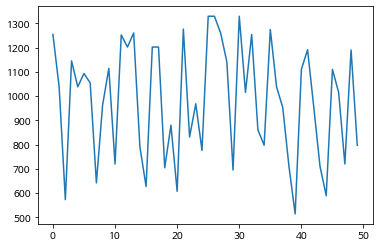

In [ ]:
plt.plot(lunch_count_predict)
plt.show()

- 석식계 예측을 위한 모델링

  석식계도 중식계와 동일한 프로세스로 진행되므로 하나의 셀에서 모델링부터 예측값 확인까지 다뤄봅시다.

  \* 예측하고자 하는 대상 target이 중식계에서 석식계로 달라집니다.  
  \* 중식계 프로세스와 석식계 프로세스가 유사하게 진행되므로 변수의 이름을 각각 lunch_, dinner_ 형식으로 저장했습니다.

In [ ]:
# 1. 모델링
X = train[features]
y = train["석식계"]

# 2. 모델 정의
dinner_model = DecisionTreeRegressor()

# 3. 모델 학습
# fit() 메소드 이용
dinner_model.fit(X, y)

# 4. 예측
# predict() 메소드 이용
dinner_count_predict = dinner_model.predict(test[features])

# 5. 예측값 확인
pd.DataFrame({"석식계": dinner_count_predict}).head(1)

,석식계
0,360.0


- 석식계 예측값 시각화

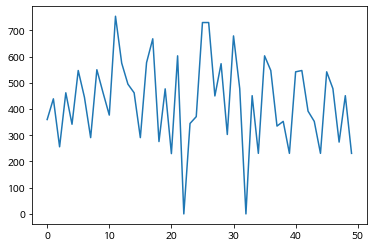

In [ ]:
plt.plot(dinner_count_predict)
plt.show()

- 의사결정나무의 의사결정 과정

  sklearn 라이브러리의 tree 모듈이 제공하는 plot_tree() 함수를 사용하면 의사 결정 나무의 의사 결정 화면을 보여줍니다.

  \* 주석처리 되어있는 코드를 실행하면 아래의 그림을 저장할 수 있습니다.
  ```
  # 이미지를 저장하는 코드
  plt.savefig('tree_high_dpi', dpi=150)
  ```



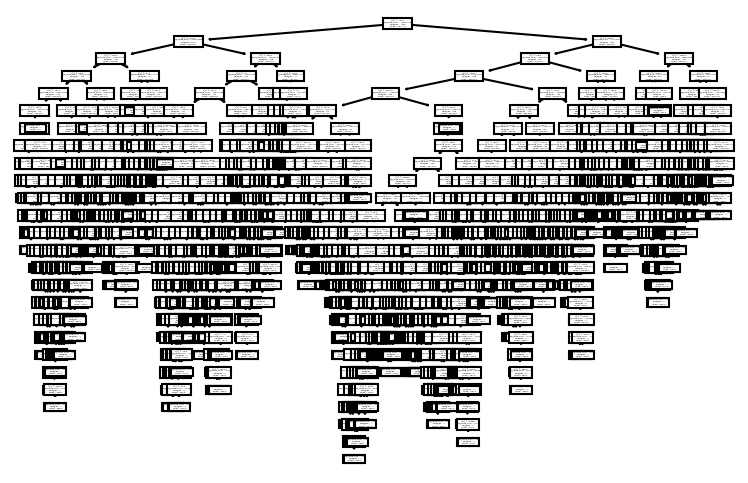

In [ ]:
from sklearn import tree

plt.figure(dpi=150)
tree.plot_tree(dinner_model)
# plt.savefig('tree_high_dpi', dpi=150)
plt.show()

### f) 제출 파일 생성

모델링을 통해 얻은 **중식계 예측값 lunch_count_predict**과 **석식계의 예측값 dinner_count_predict**을 정답 제출용 파일에 채워넣습니다.  



In [ ]:
# 제출용 파일에 예측값 채워넣기
submission["중식계"] = lunch_count_predict
submission["석식계"] = dinner_count_predict
submission.head(1)

,일자,중식계,석식계
0,2021-01-27,1254.0,360.0


실제 데이콘에 제출할 파일 **submission.csv** 파일을 생성합니다.

In [ ]:
# 제출 파일 저장
submission.to_csv("submission.csv", index=False)

### 결과

![image](https://user-images.githubusercontent.com/91044039/169643360-faddf389-ccbf-47ef-8634-46b75c1a17c2.png)


## 5.EDA(Exploratory Data Analysis)

EDA(Exploratory Data Analysis, 탐색적 자료 분석)란 수집한 데이터를 분석하기 전에 데이터의 특성을 관찰하고 이해하는 단계입니다.

- **탐색적 자료 분석**

  > 1) 데이터 수집
  >
  > 2) 시각화 탐색
  >
  > 3) 패턴 도출
  >
  > 4) 인사이트 발굴

- **EDA 하는 법**

  > **1) Target을 주인공으로 (Study1)**
  >
  > 2) Feature를 주인공으로 (Study2)
  >
  > 3) Target과 Feature의 관계 (Study2)

  ![image](https://user-images.githubusercontent.com/91044039/169638324-8f6ff069-91ff-45c6-81c0-6f9114cfcec2.png)

  \* 이번 Study1에서는 Target을 주인공으로 한 EDA를 다룹니다.  
  \* Feature를 주인공으로 한 EDA와 Target과 Feature의 관계에 관한 EDA는 다음 Study2에서 진행됩니다.

### 1) Target을 주인공으로 - 중식계

구내식당 식수 데이터 중 예측하고자 하는 대상 즉 Target 은 중식계와 석식계로 2개입니다.

중식계를 주인공으로 한 EDA를 먼저 진행해봅시다.

In [ ]:
train

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0
1201,2021-01-21,목,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0
1202,2021-01-22,금,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0
1203,2021-01-25,월,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0


#### 중식계 시각화

  중식계를 plot 선 그래프로 시각화하여 살펴봅니다.

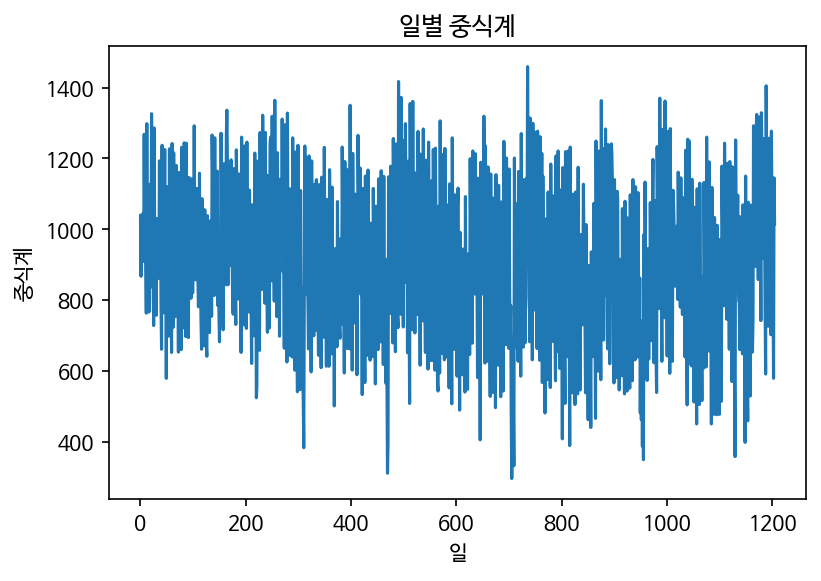

In [ ]:
plt.figure(dpi=150)
plt.title("일별 중식계")
plt.xlabel("일")
plt.ylabel("중식계")
plt.plot(train.index, train["중식계"])
plt.show()

어떤 특징이 있나요?

- 중식계는 800~1200 범위에 주로 분포하네요.
- 눈에 띄게 중식계가 작은 날(500미만)이 존재합니다.

#### 중식계 이상치

- 중식계가 매우 작은 날(500미만)

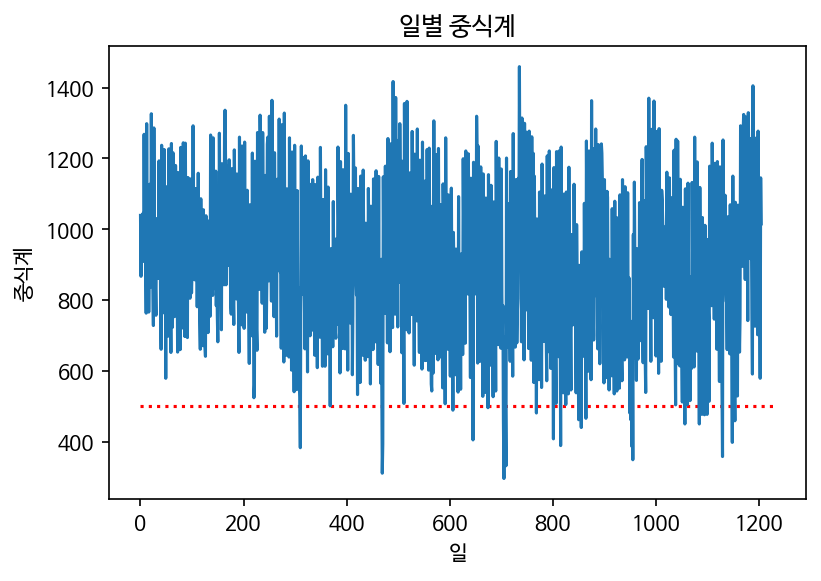

In [ ]:
plt.figure(dpi=150)
plt.title("일별 중식계")
plt.xlabel("일")
plt.ylabel("중식계")
plt.plot(train.index, train["중식계"])
plt.hlines(y=500, xmin=0, xmax=1230, color="red", linestyle="dotted")
plt.show()

중식계가 500미만인 데이터만 추출해 살펴봅시다.

In [ ]:
train[train["중식계"] < 500].head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
310,2017-05-04,목,2637,1224,41,45,0.0,모닝롤/단호박샌드 우유/주스 계란후라이 홍게살죽/쌀밥 (쌀:국내산) 시래기된장국 ...,쌀밥/잡곡밥 (쌀:국내산) 들깨미역국 닭갈비 생선까스*타르소스 무생채 포기김...,야채볶음밥 (쌀:국내산) 유부주머니국 미니버거 야채비빔만두 스틱단무지/오렌지주...,383.0,262.0
469,2017-12-28,목,2665,240,260,55,0.0,모닝롤/치즈프레즐 우유/주스 스크램블에그 견과류죽/쌀밥 (쌀:국내산) 피바지락국 ...,쌀밥/잡곡밥 (쌀:국내산) 아욱된장국 돼지갈비찜 콩나물겨자채 참나물무침 포기...,쌀밥/잡곡밥 (쌀:국내산) 옛날왕돈까스 크림스프 감자범벅/오이피클 과일샐러드 ...,311.0,245.0
470,2017-12-29,금,2665,489,242,5,0.0,모닝롤/크로와상 우유/주스 계란후라이 해물죽/쌀밥 (쌀:국내산) 냉이된장국 마늘...,쌀밥/잡곡밥 (쌀:국내산) 어묵국 닭볶음탕 연근땅콩조림 파래김*양념 배추겉절...,쌀밥/잡곡밥 (쌀:국내산) 육개장 자반고등어구이 비엔나감자볶음 청경채무침 포...,394.0,209.0
606,2018-07-20,금,2704,273,291,49,0.0,모닝롤/고구마파이 우유/주스 계란후라이 해물죽/쌀밥 (쌀:국내산) 대구찌개 오이...,쌀밥/잡곡밥 (쌀:국내산) 우무콩국 유자청제육볶음 통도라지구이 호박잎*양배추쌈...,쌀밥/잡곡밥 (쌀:국내산) 꽃게탕 돈육간장강정 두부구이 아몬드멸치볶음 포기김...,489.0,394.0
645,2018-09-14,금,2763,174,313,132,0.0,모닝롤/크로와상 우유/주스 계란후라이 해물죽/쌀밥 (쌀:국내산) 선지해장국 멸치...,쌀밥/잡곡밥 (쌀:국내산) 고추장찌개 언양식불고기 계란말이 상추파무침 포기김...,쌀밥/잡곡밥 (쌀:국내산) 도토리묵냉국 해물누룽지탕 동그랑땡전 도라지무침 포...,405.0,375.0


어떤 특징을 발견했나요?

- 일자가 2017-05-04인 데이터(첫 행)를 보면 본사정원수에 비해 본사휴가자수가 많아 보입니다.

  \* 중식계가 작을 때, 본사휴가자수가 많은 지 시각화를 통해 확인해볼까요?

- 중식계가 작은 날(500미만)과 작지 않은 날(500이상)의 본사휴가자수 평균을 비교

  중식계가 500미만인 날의 본사휴가자수 평균과 500이상인 날의 본사휴가자수 평균을 bar 막대 그래프로 시각화하여 살펴보겠습니다.

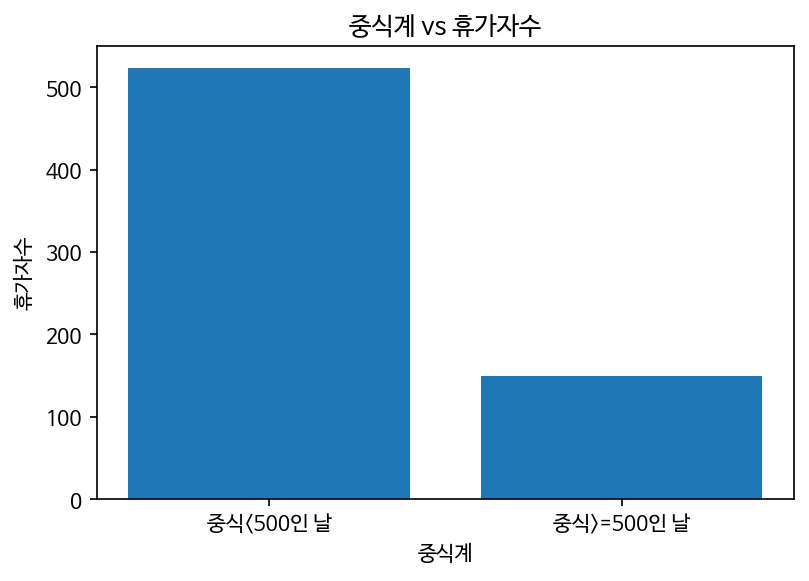

In [ ]:
x = ["중식<500인 날", "중식>=500인 날"]
y = [
    train[train["중식계"] < 500]["본사휴가자수"].mean(),
    train[train["중식계"] >= 500]["본사휴가자수"].mean(),
]

plt.figure(dpi=150)
plt.title("중식계 vs 휴가자수")
plt.xlabel("중식계")
plt.ylabel("휴가자수")
plt.bar(x, y)
plt.show()

중식계가 작은 날(500미만)의 휴가자수 평균이 작지 않은 날(500이상)의 휴가자수 평균보다 3배 이상입니다.

휴가자수 변화는 중식계에 영향을 준다고 말할 수 있겠습니다.

#### 중식계 이상치 발생 원인

- 휴가자 수

### 2) Target을 주인공으로 - 석식계

구내식당 식수 데이터는 Target이 중식계와 석식계로 2개였죠.

이번에는 석식계를 주인공으로 한 EDA를 진행해보겠습니다.

#### 석식계 시각화

  석식계를 plot 선 그래프로 시각화하여 살펴봅니다.

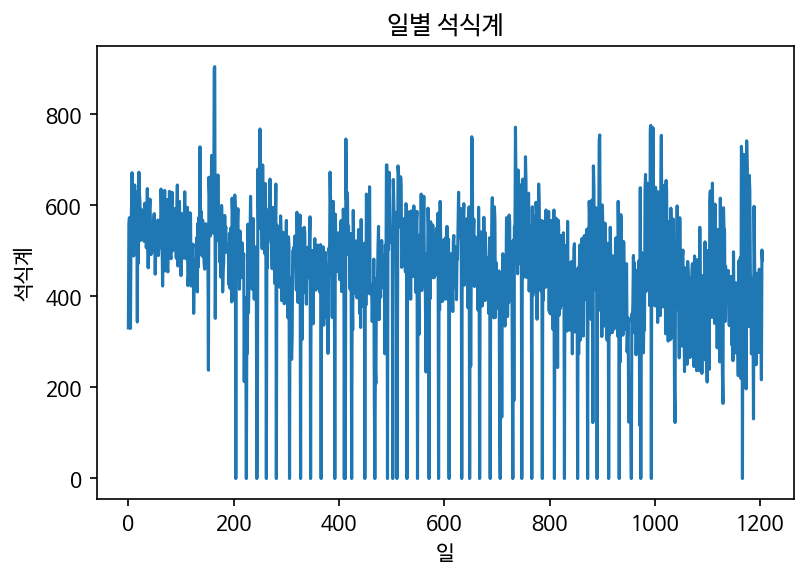

In [ ]:
plt.figure(dpi=150)
plt.title("일별 석식계")
plt.xlabel("일")
plt.ylabel("석식계")
plt.plot(train.index, train["석식계"])
plt.show()

어떤 특징이 있나요?

- 석식계는 규칙적인 패턴이 보이는 것 같네요.
- 석식계는 구내식당을 이용한 인원수가 0인 날도 존재하네요.

#### 석식계 이상치

- 석식계가 0인 날

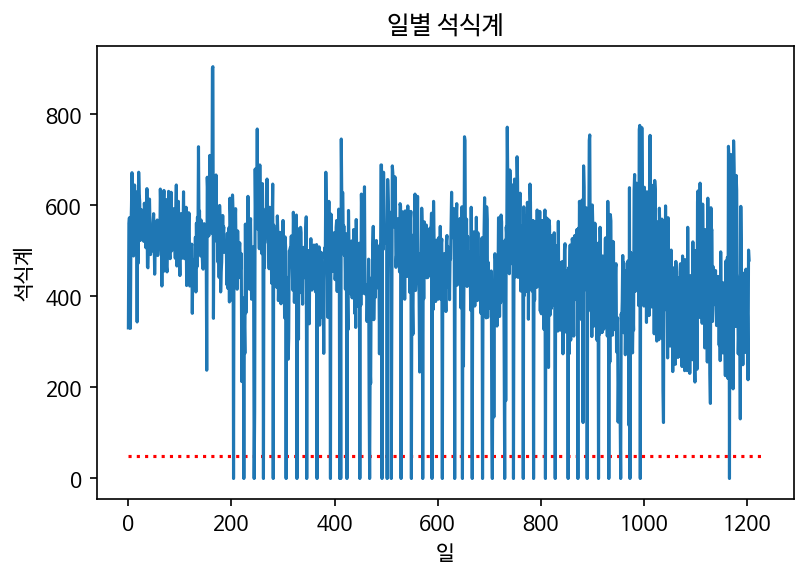

In [ ]:
plt.figure(dpi=150)
plt.title("일별 석식계")
plt.xlabel("일")
plt.ylabel("석식계")
plt.plot(train.index, train["석식계"])
plt.hlines(y=50, xmin=0, xmax=1230, color="red", linestyle="dotted")
plt.show()

석식계가 0인 데이터만 추출해 살펴봅시다.

In [ ]:
train[train["석식계"] == 0]

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
204,2016-11-30,수,2689,68,207,0,0.0,모닝롤/카스텔라 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 고추장찌개 ...,나물비빔밥 (쌀:국내산) 가쯔오장국 치킨핑거*요거트D 감자샐러드 오복지무침 ...,*,1109.0,0.0
224,2016-12-28,수,2705,166,225,0,0.0,모닝롤/고구마파이 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 북어계란국 ...,콩나물밥 (쌀:국내산) 가쯔오장국 미트볼케찹조림 꽃맛살샐러드 군고구마 배추겉...,*,767.0,0.0
244,2017-01-25,수,2697,79,203,0,0.0,모닝롤/토마토샌드 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 두부젓국찌개 ...,카레덮밥 (쌀:국내산) 맑은국 유린기 개성감자만두 오이사과무침 포기김치 (김...,*,720.0,0.0
262,2017-02-22,수,2632,75,252,0,0.0,모닝롤/브라우니 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 꽃게탕 명엽채...,나물비빔밥 (쌀:국내산) 유부장국 생선까스*탈탈소스 파스타샐러드 마늘쫑볶음 ...,*,1065.0,0.0
281,2017-03-22,수,2627,53,235,0,0.0,모닝롤/찐빵 우유/주스 계란후라이 김치죽/쌀밥 (쌀:국내산) 콩나물국 김실파무침...,쌀밥/잡곡밥 (쌀:국내산) 돈육김치찌개 유린기 비엔나볶음 세발나물 깍두기 (...,*,953.0,0.0
306,2017-04-26,수,2626,45,304,0,0.0,모닝롤/와플 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 된장찌개 검정콩조...,비빔밥 (쌀:국내산) 맑은국 오징어튀김 견과류조림 하와이안샐러드 깍두기 (김...,*,835.0,0.0
327,2017-05-31,수,2637,43,265,0,0.0,모닝롤/베이글 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 두부젓국찌개 자...,열무보리비빔밥 (쌀:국내산) 가쯔오장국 탕수만두 콥샐러드 오이지무침 포기김치...,자기계발의날,910.0,0.0
346,2017-06-28,수,2648,58,259,0,0.0,모닝롤/단팥빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 쇠고기매운국 고...,콩나물밥 (쌀:국내산) 얼갈이된장국 삼치구이 잡채 아삭고추무침 깍두기 (김치...,*자기계발의날*,745.0,0.0
366,2017-07-26,수,2839,254,246,0,0.0,모닝롤/단팥빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 민물새우찌개 숙...,나물비빔밥 미소장국 파스타샐러드 소세지오븐구이 오렌지 포기김치 (김치:국내산),가정의날,797.0,0.0
392,2017-09-01,금,2642,177,303,45,0.0,모닝롤/단팥빵 우유/주스 계란후라이 단호박죽/쌀밥 (쌀:국내산) 대구찌개 깻순나...,쌀밥/잡곡밥 (쌀:국내산) 시래기국 훈제오리구이 두부구이*양념장 쌈무/양파절임...,*,663.0,0.0


어떤 특징을 발견했나요?

- 석식메뉴가 존재하지 않네요.
- 중간중간 **자기계발의날** 로 표기되어 있는 것으로 보아 구내식당 자체적으로 석식이 제공되지 않는 날이 있나봅니다.
- 수요일이 많습니다.

  \* 석식계 시각화를 통해 좀 더 확인해볼까요?

#### 석식계 이상치 발생 원인
- 자기 계발의 날

#### 석식계 패턴

- 규칙적인 패턴(일정한 주기로 감소)이 보이는 구간

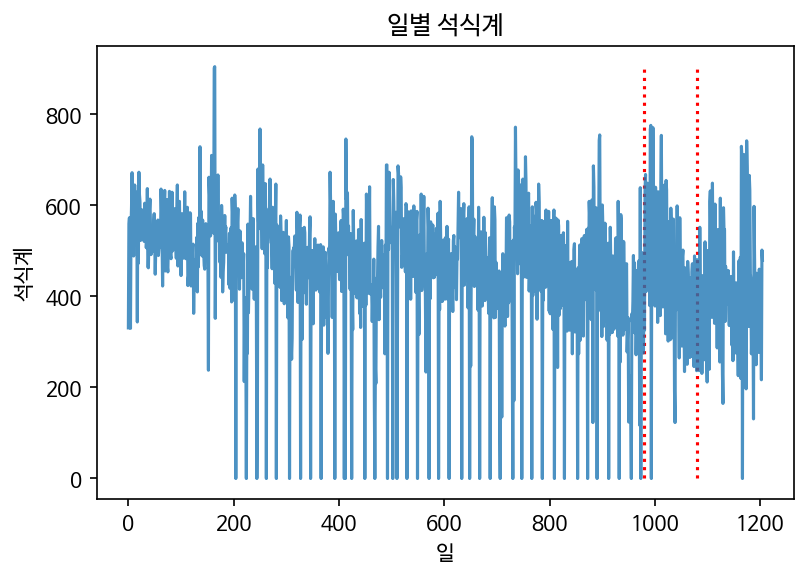

In [ ]:
plt.figure(dpi=150)
plt.title("일별 석식계")
plt.xlabel("일")
plt.ylabel("석식계")
# 석식계가 높은 지점
plt.vlines(x=980, ymin=0, ymax=900, color="red", linestyle="dotted")
# 석식계가 낮은 지점
plt.vlines(x=1080, ymin=0, ymax=900, color="red", linestyle="dotted")
plt.plot(train.index, train["석식계"], alpha=0.8)
plt.show()

이번 구내식당 데이터는 일자가 순차적으로 배열된 데이터로 시계열 데이터(time series)입니다.

\* 일정한 주기로 반복적인 패턴을 보이는 석식계는 일자 정보와 연관이 있지 않을까요?

- 일자 칼럼에서 필요한 정보 추출하기
  
  일자는 년도-월-일(YYYY-MM-DD) 형식을 가집니다.

  일자 칼럼에서 연도, 월, 일 정보를 추출하는 방법을 알아봅시다.

\+ 차근차근 알아봅시다!

```
# Step1. 일자의 0번 인덱스 정보입니다.
train['일자'][0]       # '2016-02-01'

# Step2. Step1.결과 '2016-02-01'에서 슬라이싱 기법으로 월 정보를 추출합니다.
train['일자'][0][5:7]  # '02'
```
\* Step2. 에서 슬라이싱 범위를 다르게 지정하면 연도, 월, 일의 데이터를 얻을 수 있겠네요.

---



##### 석식계 패턴1

- 월 칼럼 추가 (연도 고려 X)
  
  년도-월-일(YYYY-MM-DD) 형태인 일자 데이터에서 월 정보(MM)를 추출하고 시각화해봅시다!

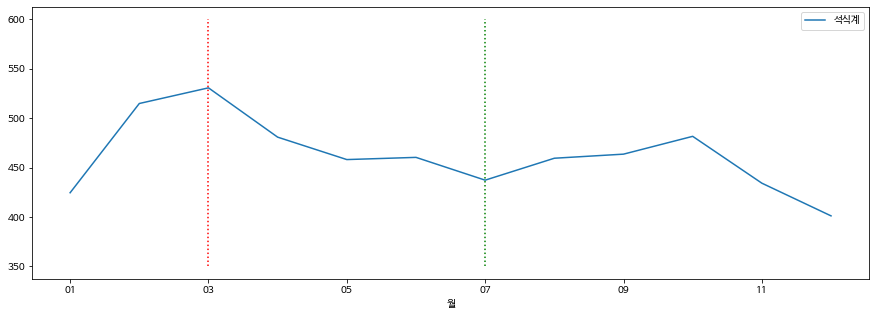

In [ ]:
# 일자에서 월 정보를 얻기 위한 함수
def month(text: str):
    return text[5:7]


# 월 칼럼 추가 - month 함수가 적용된 결과
train["월"] = train["일자"].map(month)

# 월별 석식계 평균 시각화
train.groupby("월").mean()[["석식계"]].plot(figsize=(15, 5))
# 3월
plt.vlines(x=2, ymin=350, ymax=600, color="red", linestyle="dotted")
# 7월
plt.vlines(x=6, ymin=350, ymax=600, color="green", linestyle="dotted")
plt.show()

어떤 특징을 발견했나요?
- 3월부터 7월까지 지속적으로 감소하는 추세이네요!

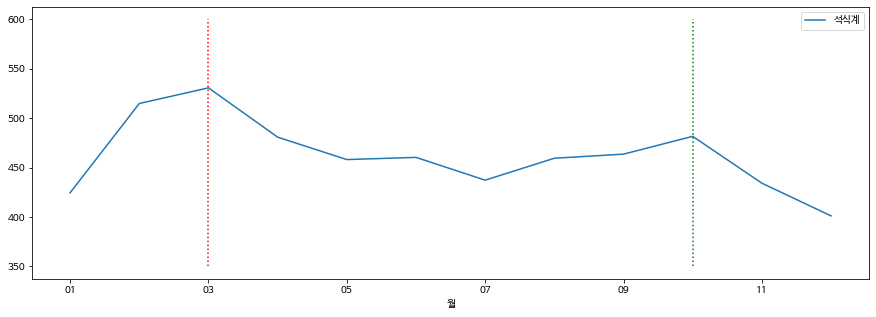

In [ ]:
# 일자에서 월 정보를 얻기 위한 함수
def month(text: str):
    return text[5:7]


# 월 칼럼 추가 - month 함수가 적용된 결과
train["월"] = train["일자"].map(month)

# 월별 석식계 평균 시각화
train.groupby("월").mean()[["석식계"]].plot(figsize=(15, 5))
# 3월
plt.vlines(x=2, ymin=350, ymax=600, color="red", linestyle="dotted")
# 10월
plt.vlines(x=9, ymin=350, ymax=600, color="green", linestyle="dotted")
plt.show()

어떤 특징을 발견했나요?
- 3월과 10월에 구내식당의 석식 이용자수가 많은 것으로 보입니다.

##### 석식계 패턴2

- 월 칼럼 추가 (연도 고려)
  
  이번에는 년도-월-일(YYYY-MM-DD) 형태인 일자 데이터에서 연도를 고려한 월 정보(YYYY-MM)를 추출하고 시각화해봅시다!

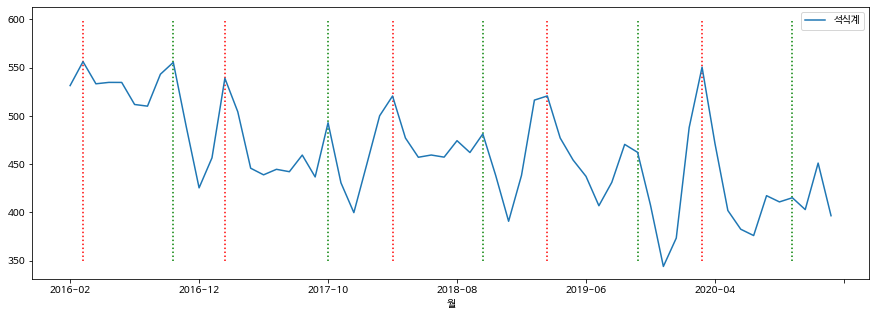

In [ ]:
# 일자 데이터에서 연도-월 정보를 추출하기 위한 함수
def month(text: str):
    return text[:7]


# 월 칼럼 업데이트(덮어씀) - month 함수가 적용된 결과
train["월"] = train["일자"].map(month)

# 연도-월별 석식계의 평균 시각화
train.groupby("월").mean()[["석식계"]].plot(figsize=(15, 5))
# 3월, 10월
plt.vlines(x=1, ymin=350, ymax=600, color="red", linestyle="dotted")
plt.vlines(x=8, ymin=350, ymax=600, color="green", linestyle="dotted")
plt.vlines(x=12, ymin=350, ymax=600, color="red", linestyle="dotted")
plt.vlines(x=20, ymin=350, ymax=600, color="green", linestyle="dotted")
plt.vlines(x=25, ymin=350, ymax=600, color="red", linestyle="dotted")
plt.vlines(x=32, ymin=350, ymax=600, color="green", linestyle="dotted")
plt.vlines(x=37, ymin=350, ymax=600, color="red", linestyle="dotted")
plt.vlines(x=44, ymin=350, ymax=600, color="green", linestyle="dotted")
plt.vlines(x=49, ymin=350, ymax=600, color="red", linestyle="dotted")
plt.vlines(x=56, ymin=350, ymax=600, color="green", linestyle="dotted")
plt.show()

어떤 특징을 발견했나요?
- 연도를 고려한 월 정보를 사용하니 연도 변화에 따른 월별 석식계 패턴이 확인되네요!

##### 석식계 패턴3

- 일 칼럼 추가
  
  년도-월-일(YYYY-MM-DD) 형태인 일자 데이터에서 일 정보(DD)를 추출하고 시각화해봅시다!

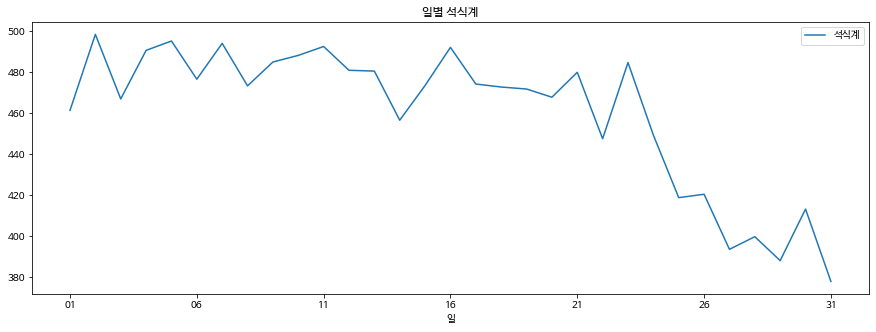

In [ ]:
# 일자 데이터에서 일 정보를 추출하기 위한 함수
def day(text: str):
    return text[8:]


# 일 칼럼 추가
train["일"] = train["일자"].map(day)

# 일별 석식계 평균 시각화
train.groupby("일").mean()[["석식계"]].plot(figsize=(15, 5))
plt.title("일별 석식계")
plt.show()

어떤 특징을 발견했나요?
- 월말에는 석식계가 급격히 줄어드네요!

##### 석식계 패턴4

- 요일 별 석식계 평균 비교

  이번에는 요일 정보를 가지고 시각화를 진행해볼까요?

  요일별 석식계의 평균을 bar 막대 그래프로 시각화합니다.

  \* 구내식당 데이터에서 요일은 평일(월, 화, 수, 목, 금)만 존재합니다.


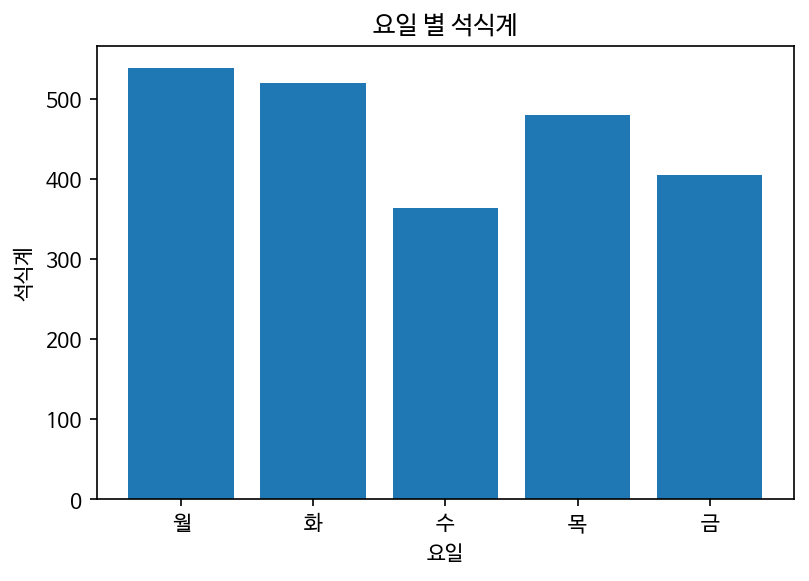

In [ ]:
# 요일별 석식계 평균 비교
x = ["월", "화", "수", "목", "금"]
y = [
    train.groupby("요일").mean()["석식계"][3],
    train.groupby("요일").mean()["석식계"][4],
    train.groupby("요일").mean()["석식계"][2],
    train.groupby("요일").mean()["석식계"][1],
    train.groupby("요일").mean()["석식계"][0],
]

plt.figure(dpi=150)
plt.title("요일 별 석식계")
plt.xlabel("요일")
plt.ylabel("석식계")
plt.bar(x, y)
plt.show()

어떤 특징을 발견했나요?
- 자기계발의 날로 추정되는 수요일에는 석식 이용자 수가 적네요!
- 금요일에도 석식 이용자 수가 적은 것이 보입니다.


#### 석식계 패턴 분석

- 석식계 월별 분포

  - 3월부터 7월까지 지속적으로 감소

  - 3월과 10월에 석식 이용 인원이 가장 많음

- 석식계 일별 분포

  - 석식 이용 인원은 월초에 가장 많고 월말까지 지속적으로 감소

- 석식계 요일 별 분포

  - 요일별로는 수요일과 금요일에 다른 날보다 이용 인원이 적음

## 6.인사이트

- **휴가자수** - 중식계 이상치 발생 원인  
  test셋에 존재하는 데이터이므로 예측 가능
- **자기계발의 날** - 석식계 이상치 발생 원인  
  test셋에 존재하지 않은 데이터이므로 예측 불가능
  - 석식계 이용자수가 0인 날 삭제
- **월별, 일별, 요일별** 다른 분포  
  - 데이터에 월, 일 칼럼 추가
  - 요일 칼럼 전처리

### 1)중식계 이상치 발생 원인 

- 휴가자수

  휴가자수는 test셋에 존재하는 데이터이므로 중식계 이상치는 예측 가능한 값

In [ ]:
test.head(1)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치


### 2)석식계 이상치 발생 원인
- 자기 계발의 날

  우리가 예측하고자 하는 일자인 test 데이터에는 자기 계발의 날이 없음

  모델에 악영향을 미칠 수 있으므로 석식계 이용 인원이 0인 날 삭제

In [ ]:
test

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치
3,2021-02-01,월,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치
4,2021-02-02,화,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치
5,2021-02-03,수,2924,59,199,5,286.0,모닝롤/게살모닝샌드 우유/주스 계란후라이/찐계란 소고기죽/흑미밥 시래기된장국 베이컨...,쌀밥/흑미밥/찰현미밥 아욱국 매콤해물볶음 감자조림 미나리나물 포기김치 콥샐러드*렌치D,오므라이스 가쓰오장국 빌소세지구이*구운채소 단감치커리무침 양념고추지 겉절이김치
6,2021-02-04,목,2924,61,211,476,288.0,모닝롤/사과파이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 아욱국 새송이버섯곤약장...,쌀밥/차조밥/찰현미밥 설렁탕 고등어김치말이찜 볼어묵굴소스볶음 브로콜리숙회*초장 석박...,흑미밥 계란파국 돈육두루치기 감자채파프리카볶음 세발나물오리엔탈무침 포기김치
7,2021-02-05,금,2924,169,252,0,256.0,모닝롤/앙버터모닝빵 우유/주스 계란후라이/찐계란 고구마죽/흑미밥 옹심이국 머위나물무...,쌀밥/흑미밥/찰현미밥 북엇국 닭볶음탕 채소전*장 솎음열무나물무침 포기김치 양상추샐러...,유부초밥/추가밥 온메밀소바 국물떡볶이 순대찜*소금 청경채겉절이 포기김치
8,2021-02-08,월,2924,88,174,690,329.0,모닝롤/스콘 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 꽃게탕 근대나물무침 연두부...,쌀밥/흑미밥/찰현미밥 감자양파국 돈수육*씨앗쌈장 매콤어묵볶음 콩나물파채무침 포기김치...,흑미밥 냉이국 반반치킨 꼬막채소무침 청경채찜 포기김치
9,2021-02-09,화,2924,94,183,542,329.0,모닝롤/치즈팡샌드 우유/주스 계란후라이/찐계란 팥죽/흑미밥 맑은버섯국 시금치나물무침...,쌀밥/기장밥/찰현미밥 장각백숙 적어양념장구이 채소스틱*쌈장 도라지오이초무침 겉절이김...,흑미밥 미역국 매운소불고기 단호박두부탕수 메추리알장조림 석박지


>\* 예측가능한 이상치는 분석에 사용한다.
>
>\* 예측불가능한 이상치는 분석에 사용하지 않는다.

- train 데이터 다시 불러오기

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/구내식당/train.csv")
train

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0
1201,2021-01-21,목,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0
1202,2021-01-22,금,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0
1203,2021-01-25,월,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0


- 석식계가 0이 아닌 데이터만 선택 (= 석식계가 0인 데이터 삭제)

In [ ]:
train = train[train["석식계"] != 0]
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


### 3)석식계 패턴

- 월별, 일별, 요일별로 서로 다른 분포

  - 데이터에 월, 일 칼럼 추가
  - 요일 칼럼 전처리

  EDA를 통해 일자 정보의 월, 일 정보와 요일 정보가 Target과 연관이 있다는 것을 확인했습니다.

  그러면 월, 일, 요일 정보를 포함하여 분석을 진행하면 예측값이 정답에 더 가까워지지 않을까요?


>한 번 언급했듯 문자(텍스트) 데이터는 분석에 바로 사용할 수 없습니다.
>
>따라서 문자 데이터인 일자, 요일 정보를 분석에 활용하기 위해서는 숫자 데이터로 전처리해주어야 됩니다.

#### 요일 칼럼 전처리 - 변경
  
  요일 정보를 다음과 같이 숫자 데이터로 변경합시다.
  - 월 -> 1
  - 화 -> 2
  - 수 -> 3
  - 목 -> 4
  - 금 -> 5

\* 요일 칼럼에는 평일(월, 화, 수, 목, 금)만 존재합니다.

요일의 "월" 데이터를 1로 변경하고 확인해봅니다.

In [ ]:
# 요일이 "월"이라면 1로 변경
train.loc[train["요일"] == "월", "요일"] = 1
train

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,1,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0
1201,2021-01-21,목,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0
1202,2021-01-22,금,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0
1203,2021-01-25,1,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0


잘 변경되었네요. 다른 요일들도 마저 변경하겠습니다.

In [ ]:
# 요일 정보를 숫자로 변경하기
train.loc[train["요일"] == "화", "요일"] = 2
train.loc[train["요일"] == "수", "요일"] = 3
train.loc[train["요일"] == "목", "요일"] = 4
train.loc[train["요일"] == "금", "요일"] = 5
train

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,1,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,2,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,3,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,4,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,5,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,3,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0
1201,2021-01-21,4,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0
1202,2021-01-22,5,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0
1203,2021-01-25,1,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0


나머지 요일들도 숫자로 잘 변경된 것 같습니다.

unique() 함수를 사용해 요일의 고유값을 확인하여 전처리가 잘 되었는지 점검해볼까요?

In [ ]:
train["요일"].unique()

array([1, 2, 3, 4, 5], dtype=object)

기존 평일에 대한 요일 정보에서 1,2,3,4,5 로 전처리가 잘 진행되었음을 확인했습니다.

#### 일자 칼럼 전처리 - 칼럼 추가
  
일자 데이터에서 월과 일 정보를 추출합니다.

\+ 차근차근 알아봅시다!

```
# Step1. 일자의 0번 인덱스 정보입니다.
train['일자'][0]       # '2016-02-01'

# Step2. Step1.결과 '2016-02-01'에서 슬라이싱 기법으로 월 정보를 추출합니다.
train['일자'][0][5:7]  # '02'

# Step3. Step2.결과 '02'를 정수형(int)으로 변환합니다.
int(train['일자'][0][5:7])  # 2
```
\* int() 함수는 수치형 데이터로 변경하는데 중요한 역할을 하는군요! 

---



In [ ]:
train["일자"][0]

'2016-02-01'

In [ ]:
int(train["일자"][0][5:7])

2

In [ ]:
# 일자 데이터에서 월 정보를 추출하기 위한 함수
def month(text: str):
    return int(text[5:7])  # 정수형 변환


# 월 칼럼 추가 - 일자 데이터에 month 함수를 적용한 결과
train["월"] = train["일자"].map(month)
train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,월
0,2016-02-01,1,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2
1,2016-02-02,2,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2
2,2016-02-03,3,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2
3,2016-02-04,4,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2
4,2016-02-05,5,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,3,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0,1
1201,2021-01-21,4,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0,1
1202,2021-01-22,5,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0,1
1203,2021-01-25,1,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0,1


기존에 없었던 칼럼을 추가하면 데이터의 마지막 열에 생성됩니다.

월 정보의 고유값들을 unique() 함수를 적용하여 확인해봅니다.

In [ ]:
train["월"].unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1])

월 정보도 1부터 12까지 정수형으로 잘 추출되었네요!

이제 동일한 방식으로 일 정보도 추출하여 일 칼럼을 새롭게 추가합시다.

In [ ]:
# 일자 데이터에서 일 정보를 추출하기 위한 함수
def day(text: str):
    return int(text[-2:])


# 일 칼럼 추가 - 일자 데이터에 day 함수를 적용한 결과
train["일"] = train["일자"].map(day)
train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,월,일
0,2016-02-01,1,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2,1
1,2016-02-02,2,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2,2
2,2016-02-03,3,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2,3
3,2016-02-04,4,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2,4
4,2016-02-05,5,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,3,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0,1,20
1201,2021-01-21,4,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0,1,21
1202,2021-01-22,5,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0,1,22
1203,2021-01-25,1,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0,1,25


새롭게 추가한 일 칼럼의 고유값도 확인합니다.

In [ ]:
train["일"].unique()

array([ 1,  2,  3,  4,  5, 11, 12, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26,
       29,  7,  8,  9, 10, 14, 21, 28, 30, 31,  6, 20, 27, 13])

train 데이터의 전처리는 이제 끝났습니다.

이제 test 데이터도 전처리해볼까요?

In [ ]:
test.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치
3,2021-02-01,월,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치
4,2021-02-02,화,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치


### 4)test 데이터 전처리

In [ ]:
# 요일 정보(문자-> 숫자) 전처리
test.loc[test["요일"] == "월", "요일"] = 1
test.loc[test["요일"] == "화", "요일"] = 2
test.loc[test["요일"] == "수", "요일"] = 3
test.loc[test["요일"] == "목", "요일"] = 4
test.loc[test["요일"] == "금", "요일"] = 5

# 월 칼럼 추가
def month(text: str):
    return int(text[5:7])


test["월"] = test["일자"].map(month)

# 일 칼럼 추가
def day(text: str):
    return int(text[-2:])


test["일"] = test["일자"].map(day)

# 확인
test.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,월,일
0,2021-01-27,3,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치,1,27
1,2021-01-28,4,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지,1,28
2,2021-01-29,5,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치,1,29
3,2021-02-01,1,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치,2,1
4,2021-02-02,2,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치,2,2


## 7.모델 수정

In [ ]:
train

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,월,일
0,2016-02-01,1,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2,1
1,2016-02-02,2,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2,2
2,2016-02-03,3,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2,3
3,2016-02-04,4,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2,4
4,2016-02-05,5,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,3,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0,1,20
1201,2021-01-21,4,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0,1,21
1202,2021-01-22,5,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0,1,22
1203,2021-01-25,1,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0,1,25


우리는 분석에 사용하고자 문자(텍스트)형이었던 요일과 일자 칼럼을 수치형으로 변경하는 전처리를 진행했습니다.

따라서 요일, 월, 일 칼럼도 features로 사용할 수 있게 되었습니다.

features를 새롭게 지정해봅시다.

### 1) 데이터 선택

- features 변경 - 전처리한 칼럼 추가

In [ ]:
features = [
    "요일",
    "월",
    "일",
    "본사정원수",
    "본사휴가자수",
    "본사출장자수",
    "본사시간외근무명령서승인건수",
    "현본사소속재택근무자수",
]
train[features]

,요일,월,일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수
0,1,2,1,2601,50,150,238,0.0
1,2,2,2,2601,50,173,319,0.0
2,3,2,3,2601,56,180,111,0.0
3,4,2,4,2601,104,220,355,0.0
4,5,2,5,2601,278,181,34,0.0
...,...,...,...,...,...,...,...,...
1200,3,1,20,2983,75,198,4,391.0
1201,4,1,21,2983,92,231,462,351.0
1202,5,1,22,2983,255,248,1,303.0
1203,1,1,25,2983,107,153,616,327.0


In [ ]:
test[features]

,요일,월,일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수
0,3,1,27,2983,88,182,5,358.0
1,4,1,28,2983,104,212,409,348.0
2,5,1,29,2983,270,249,0,294.0
3,1,2,1,2924,108,154,538,322.0
4,2,2,2,2924,62,186,455,314.0
5,3,2,3,2924,59,199,5,286.0
6,4,2,4,2924,61,211,476,288.0
7,5,2,5,2924,169,252,0,256.0
8,1,2,8,2924,88,174,690,329.0
9,2,2,9,2924,94,183,542,329.0


### 2) 모델 학습 및 예측

 - 중식계와 석식계 예측

  모델링에서 다루었던 프로세스와 동일하므로 설명은 생략하겠습니다.

In [ ]:
# 중식계 예측을 위한 모델링
# 1. 모델 정의
lunch_model = DecisionTreeRegressor()

# 2. 모델 학습
# fit() 메소드 이용
lunch_model.fit(train[features], train["중식계"])

# 3. 예측
# predict() 메소드 이용
lunch_count_predict = lunch_model.predict(test[features])


# 석식계 예측을 위한 모델링
# 1. 모델 정의
dinner_model = DecisionTreeRegressor()

# 2. 모델 학습
# fit() 메소드 이용
dinner_model.fit(train[features], train["석식계"])

# 3. 예측
# predict() 메소드 이용
dinner_count_predict = dinner_model.predict(test[features])

- lunch_count_predict : 중식계 예측값
- dinner_count_predict : 석식계 예측값

### 3) 제출 파일 생성

In [ ]:
# sample_submission 데이터 불러오기
submission = pd.read_csv("/content/drive/MyDrive/구내식당/sample_submission.csv")

# 중식계와 석식계의 예측값들을 각각 채워줍니다.
submission["중식계"] = lunch_count_predict
submission["석식계"] = dinner_count_predict

# submission을 csv 파일로 저장합니다.
# 정확한 채점을 위해 꼭 index=False를 넣어주세요.
submission.to_csv("submission.csv", index=False)

### 4) 결과

[대회 페이지 바로가기](https://dacon.io/competitions/official/235997/overview/description)

대회 페이지의 **[제출] 탭**에서 실제로 제출을 해보고 **[리더보드] 탭**으로 이동하여 자신의 순위가 어디인지 확인해보세요!

그리고 자신만의 코드를 통해 어디까지 올라갈 수 있는지, 함께 도전해봐요! :]

![image](https://user-images.githubusercontent.com/91044039/169644275-472327ca-0f4a-4a5e-ac53-9589981bc0c5.png)